In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [26]:
train = pd.read_csv('internship_train.csv')

In [27]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

In [5]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,...,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,...,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,...,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,...,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,...,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999478,14.999869,14.999928,14.999948,14.999364,14.999775,99.999482


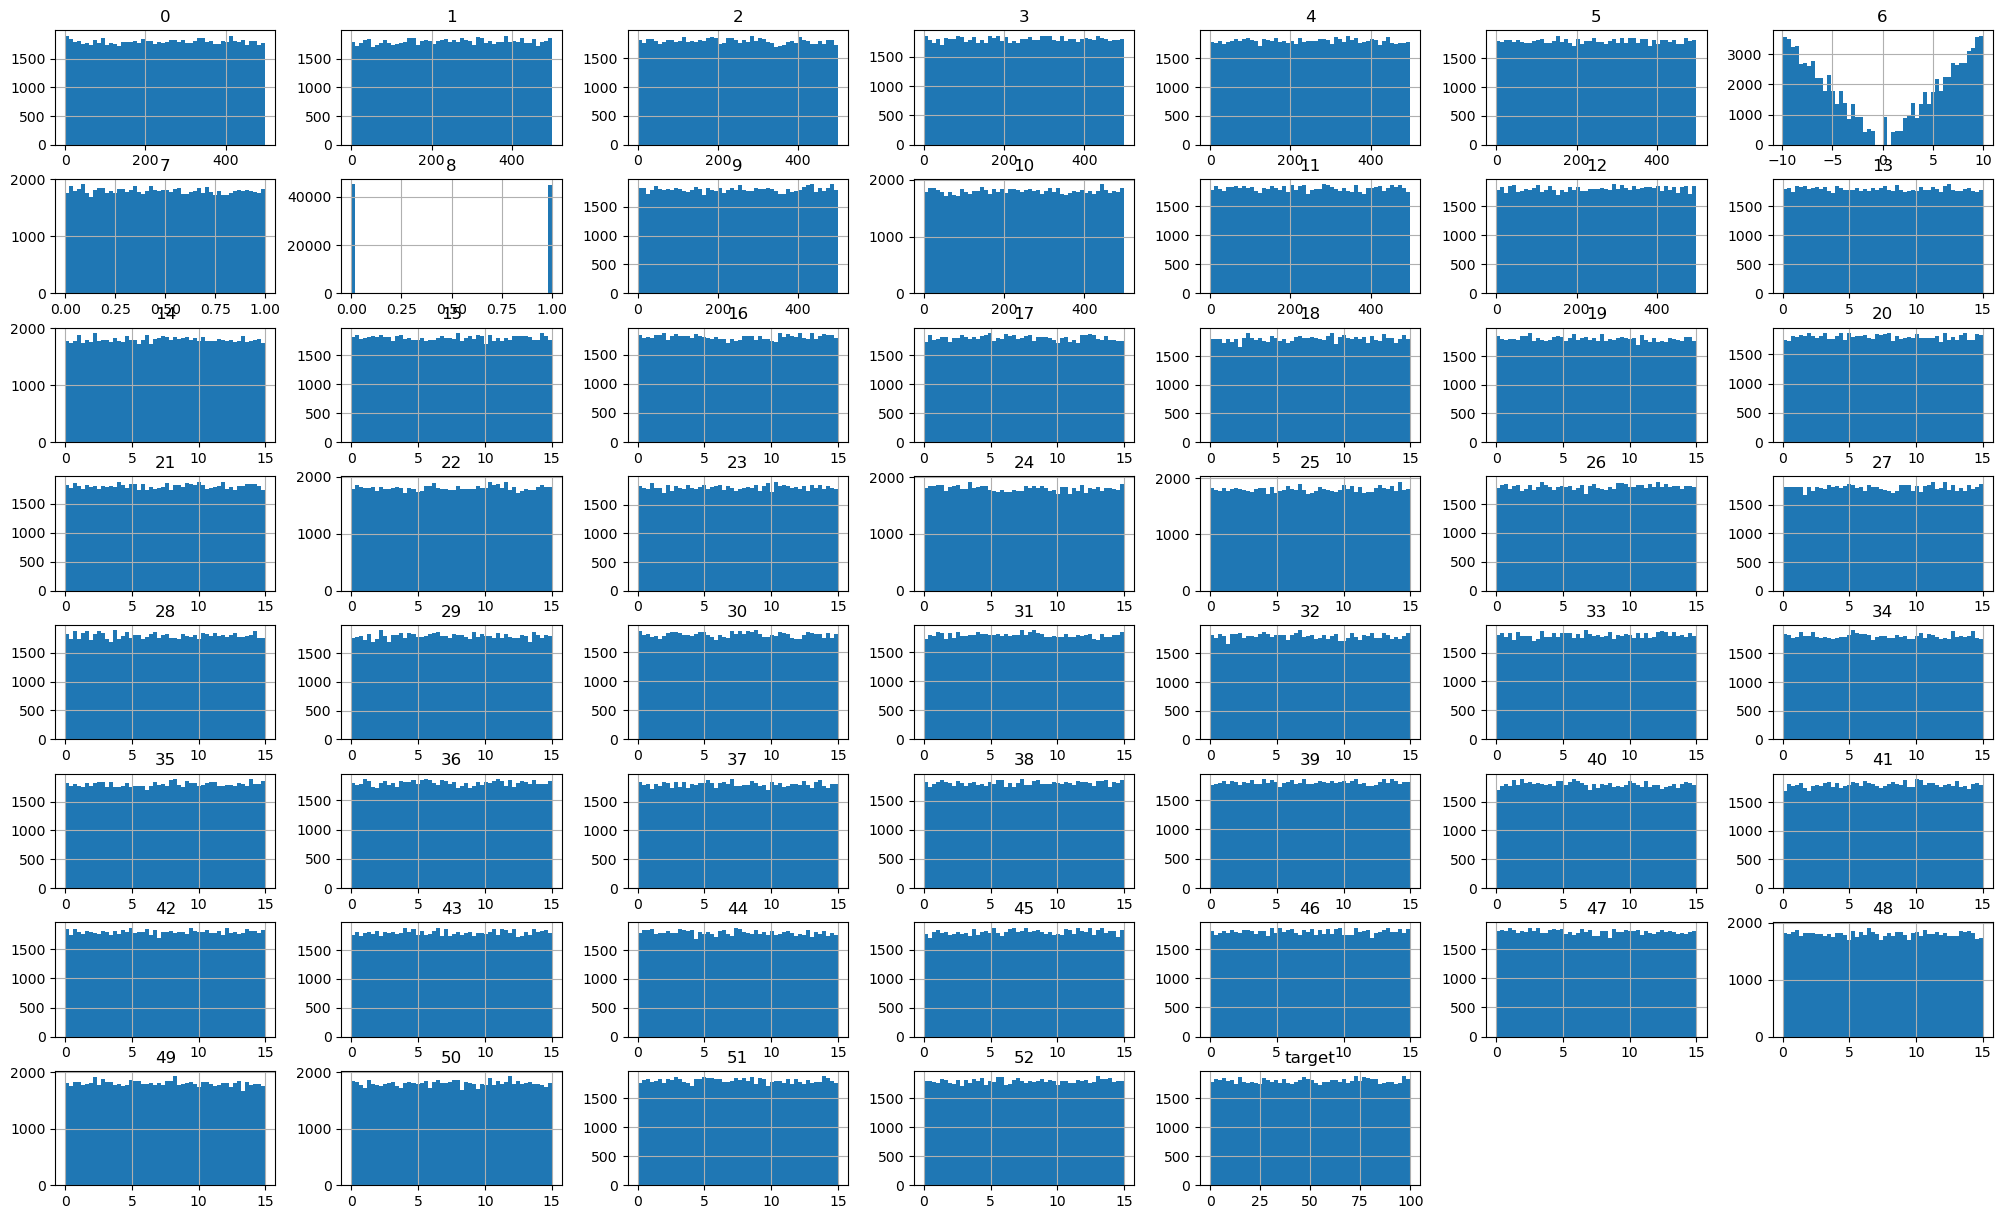

In [6]:
train.hist(bins = 50, figsize = (25,15))
plt.show()

<Axes: xlabel='6', ylabel='target'>

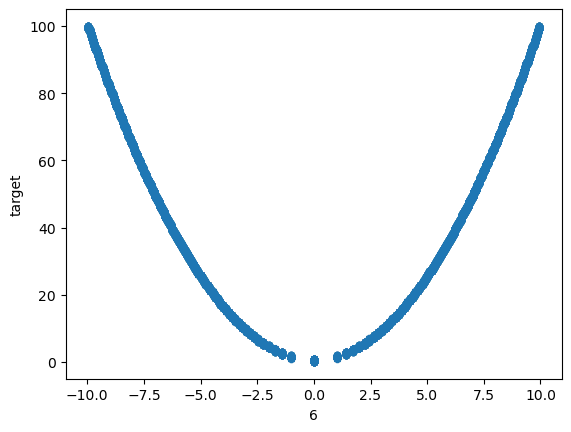

In [8]:
train.plot(kind = 'scatter', x = '6', y='target', alpha=0.1)

In [51]:
train_set, test_set = train_test_split(train, test_size = 0.2, random_state=42)

In [52]:
X_train = train_set.drop(columns = ['target'])
y_train = np.array(train_set['target'][:])
X_val = test_set.drop(columns = ['target'])
y_val = np.array(test_set['target'][:])

In [53]:
#Linear Regression
regr = LinearRegression()
  
regr.fit(X_train, y_train)
y_pred = regr.predict(X_val)
print(mean_squared_error(y_val, y_pred, squared = False))

29.015412891101406


In [54]:
#Decision Tree
tree_reg = DecisionTreeRegressor(random_state = 0)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_val)
print(mean_squared_error(y_val, y_pred, squared = False))

0.007752223591727838


In [49]:
#Random Forest
regressor = RandomForestRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_val)
print(mean_squared_error(y_val, y_pred, squared = False))

0.00382621505964197


In [9]:
#Randomized search to find best parameters
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [4]:
#It takes to long to run randomized search on all data, so I will use random sample of 500 observations
train = train.sample(n=500)
X_train = train.drop(columns = ['target'])
y_train = np.array(train['target'][:])

In [10]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\ProgramData\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [11]:
print(rf_random.best_params_)

{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}


In [13]:
#running Random Forest with tuned parameters
model = RandomForestRegressor(n_estimators = 800, min_samples_split = 2, min_samples_leaf = 1, max_features = 'auto', max_depth = 100, bootstrap = True, random_state = 0)
 
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(mean_squared_error(y_val, y_pred, squared = False))

C:\ProgramData\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


0.0036547491778549375


In [14]:
print(pd.DataFrame({'predicted':y_pred,'actual':y_val}))

       predicted     actual
0      20.437236  20.439486
1      50.237124  50.238989
2      55.976884  55.973368
3      98.504997  98.506589
4      60.351201  60.348805
...          ...        ...
17995  37.870138  37.871374
17996  31.691343  31.686006
17997  86.325485  86.324535
17998   6.160766   6.166826
17999  47.604443  47.607211

[18000 rows x 2 columns]


Our model is now that good (RMSE 0.003) that it only fails to perfectly predict decimal part. However, I noticed that a **decimal part of any target observation is equal to feature '7':**

In [15]:
print(train[['7', 'target']])

              7     target
0      0.107472  20.107472
1      0.763713  61.763713
2      0.651162  74.651162
3      0.424645  69.424645
4      0.767304  66.767304
...         ...        ...
89995  0.563878  24.563878
89996  0.861690  13.861690
89997  0.633704  38.633704
89998  0.687309  13.687309
89999  0.613207  59.613207

[90000 rows x 2 columns]


Thus, we can replace decimal parts of our predictions with decimal parts of '7' feature

In [16]:
#replacing decimal parts of our predictions with decimal parts of '7' feature
import math
for i in range(len(y_pred)):
    y_pred[i] = math.modf(y_pred[i])[1] + X_val['7'].iloc[i]

In [19]:
#Consequently, we got much lower RMSE
print(math.sqrt(mean_squared_error(y_val, y_pred)))

3.0512938040858542e-15


***Test Prediction***

In [20]:
test = pd.read_csv('internship_hidden_test.csv')

In [21]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,259,388,402,340,156,382,3.316625,0.218760,1,164,...,7.163474,10.227235,0.889111,9.190222,4.670908,0.931525,7.634177,0.158196,13.432551,2.511191
1,441,192,381,421,452,123,-8.888194,0.700228,0,349,...,10.619064,9.339161,4.221861,0.595563,13.865748,0.328453,11.507599,9.107966,1.302407,11.105604
2,83,129,107,156,247,191,2.645751,0.494556,1,297,...,1.819890,10.670237,10.350867,5.134417,5.898995,8.374986,4.638049,3.160023,2.243799,5.073030
3,183,438,191,116,491,403,-6.164414,0.511117,0,272,...,4.168135,12.782579,0.513072,0.321295,11.334062,11.735511,1.911520,8.365676,4.877288,11.601819
4,449,156,310,188,279,465,8.000000,0.756416,1,90,...,7.908122,1.140498,14.165074,7.688796,5.079241,8.152186,1.680403,13.215111,5.823109,1.038015


In [22]:
target = model.predict(test)

In [23]:
for i in range(len(target)):
    target[i] = math.modf(target[i])[1] + test['7'].iloc[i]

In [24]:
test_target = pd.DataFrame(target, columns = ['target'])

In [25]:
test_target.to_csv('internhip_test_predictions.csv')